In [ ]:
Title of the Project:  Finding the Latent Probability of answering anyone question correctly

Project Members:

Bhurtel,Balakrishna
Sadanandan,Binesh Kumar
Vechalapu,Rajendra Kumar

Abstract: This project was carried out as a part of Mr. Kim passing a written exam. There were 50 four-choice questions of two points each. To pass the test, Mr. Kim should get 60 points. He attempted the exam 950 times, of which he failed 949 attempts. In the 950th attempt, he passed the exam answering 30 questions correctly while in the rest of the attempts he answered 15 to 25 questions correctly. Here, Kim’s data is special because we do not know the precise score for each of the failed attempt. We only know that these scores range from 15 to 25. In statistical terms, this data is said to be censored. So, the main challenge in this project is to find the likelihood for the unobserved data. To find this, we used Potential function from pymc3 and plotted the distribution of latent probability of answering anyone question correctly.

Approach: As given in the question, Mr.Kim passed the exam in his 950th attempt by answering 30 questions correctly. But the number of correct questions in his previous 949 attempts were not given. Only the range of correct questions was given i.e., 15-25. The prior i.e., the probability of answering any one question correctly before any knowledge of data is between 0.25 and 1. This is taken as Uniform distribution. The number of correct questions in 'n' number of questions with prior knowledge is given by Binomial distribution. 

But the challenge here is to find the likelihood. The number of correct questions for each of the 949 attempts is not given specifically. But the range was given i.e., 15-25 correct questions. This is called interval censored data where values are missing in the given interval. In this project, unimputed censored model is used.

In Unimputed censored model, the censored data is integrated out and accounted for only through the log-likelihood. Here, we used pm.Potential() method to find the likelihood of censored data. In potential method, we passed the sum of log probability of Binomial distribution at various unobserved values between 15 and 25 multiplied by number of failed attempts. And we also found the likelihood of observed data in 950th attempt. 

At the end, we performed sampling and plotted the trace of latent probability of answering any one question correctly.

Analysis, Results & Explanation:

In [ ]:
import pymc3 as pm
import arviz as az
import numpy as np

In [ ]:
from theano.tensor.basic import log
n=50
n_cens=949
cens_vals = np.array([15,16,17,18,19,20,21,22,23,24,25])
with pm.Model() as kim:
  prob = pm.Uniform("prob", lower=0.25, upper=1)
  #likelihood for 950th attempt--observed data
  y_observed = pm.Binomial("y_observed", n, prob, observed=30)
  #likelihood for remaining 949 attempts--unobserved data
  y_censored = pm.Potential("y_censored", n_cens*pm.Binomial.dist(n, prob).logp(cens_vals).sum())

In [ ]:
with kim:
  trace_kim = pm.sample(1000, tune=1000)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In v4.0, pm.sample will return an `arviz.InferenceData` object instead of a `MultiTrace` by default. You can pass return_inferencedata=True or return_inferencedata=False to be safe and silence this warning.
  
Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Sequential sampling (2 chains in 1 job)
NUTS: [prob]


Sampling 2 chains for 1_000 tune and 1_000 draw iterations (2_000 + 2_000 draws total) took 3 seconds.


In [ ]:
az.summary(trace_kim, round_to=2, kind="stats")

Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,


,mean,sd,hdi_3%,hdi_97%
prob,0.4,0.0,0.4,0.4


Got error No model on context stack. trying to find log_likelihood in translation.
/usr/local/lib/python3.7/dist-packages/arviz/data/io_pymc3_3x.py:102: FutureWarning: Using `from_pymc3` without the model will be deprecated in a future release. Not using the model will return less accurate and less useful results. Make sure you use the model argument or call from_pymc3 within a model context.
  FutureWarning,
Got error No model on context stack. trying to find log_likelihood in translation.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fcccd2e93d0>,
      dtype=object)

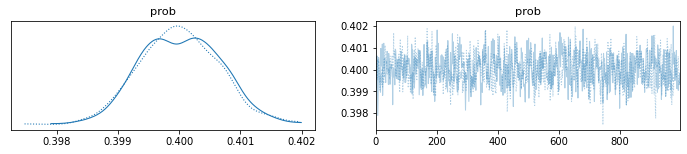

In [ ]:
az.plot_trace(trace_kim)

The above graph gives the probability distribution of the latent probability of answering any one question correctly of 50 questions. From the plotted trace, we can say that the latent probability of answering any one question correctly is between 0.398 and 0.402. We can infer the probability of answering any one question correctly even if we do not know exact scores of 949 out of 950 attempts. From the summary table, we can also find that the mean of probability of answering any one question correctly is 0.4. 











Conclusion:

In this project, we used Potential function from pymc3 to find the latent probability of answering anyone question correctly. From this analysis, we can infer a lot about the latent probability of answering any one question correctly even if we do not know the exact scores of 949 attempts. 